# Wstęp

**Naszym celem jest predykcja kursu indeksu giełdowego S&P 500**

*Projekt ten jest projektem przygotowanym przez osobę początkującą, zatem przemyślenia w nim zawarte należy traktować zgodnie z własną wiedzą i doświadczeniem*

S&P 500 jest indeksem giełdowym, w skład którego wchodzi 500 przedsiębiorstw o największej kapitalizacji, nototawnych na New York Stock Exchange i NASDAQ.

Wybrałem ten indeks, z racji tego iż jest to moja pierwsza styczność z predykcją sytuacji na giełdzie, więc chciałem zacząć od czegoś co będzie ogólne a nie skonkretyzowane już w jakimś kierunku; co pozwoli mi na implementację różnych pomysłów oraz ich 'weryfikację' a dzięki temu zdobycie doświadczenia i wiedzy w dalszych predykcjach sytuacji na giełdzie.

**Sytuację na giełdzie będziemy próbowali przewidzieć na podstawie:**<br>
* surowych informacji o indeksie tj. wartości Open, Close, Volume itp., 
* wiadomości amerykańskich z każdego dnia

# Dataset

## Dane giełdowe

Dane giełdowe pobierzemy ze strony https://stooq.com

Znajduje się tam bardzo dużo danych. Można wyeksportować dane dla konkretnego ideksu/spółki, oraz można pobrać dane całej giełdy z interwałami: co 5 minut, co godzinę, dzienne.


Dane indeksu S&P 500: https://stooq.com/q/d/?s=^spx

Dane różnych giełd (z różnymi interwałami): https://stooq.com/db/h/

## Dane z dziennymi wiadomościami

News Category Dataset: https://www.kaggle.com/datasets/rmisra/news-category-dataset

Każdy news ma przypisaną kategorię

Wybrałem ten dataset ponieważ jest on bardzo duży i każdy news ma przypisaną kategorię np. Politics. Dzięki temu możemy potem mieć większą elastyczność w kwestii predykcji kursu giełdowego.

# Sposoby predykcji

## Przewidywanie na podstawie danych z giełdy z *n* poprzednich dni

### Przewidywanie wartości Close 

*Na podstawie 30 dni*<br>
**Plik: Predict_CLOSE_M30**

*Na podstawie 0 dni (**tylko wartość Open**)*<br>
**Plik: Predict_CLOSE_M0**

#### Wnioski

Pomysł z wykorzystaniem *n* poprzednich dni jednak nie działa tak jak myślałem. Sama wartość Open może już wystarczyć by model działał z takim samym accuracy jak z wykorzystaniem danych z *n* poprzednich dni

Powyższe modele w takiej postaci są do niczego

### Przewidywanie wrostu/spadku na podstawie Volume

*Na podstawie 50 dni*<br>
**Plik: Predict_UP_DOWN_M50**

*Na podstawie 1 dnia*<br>
**Plik: Predict_UP_DOWN_M1**

#### Wyniki

*Na podstawie 1 dnia*

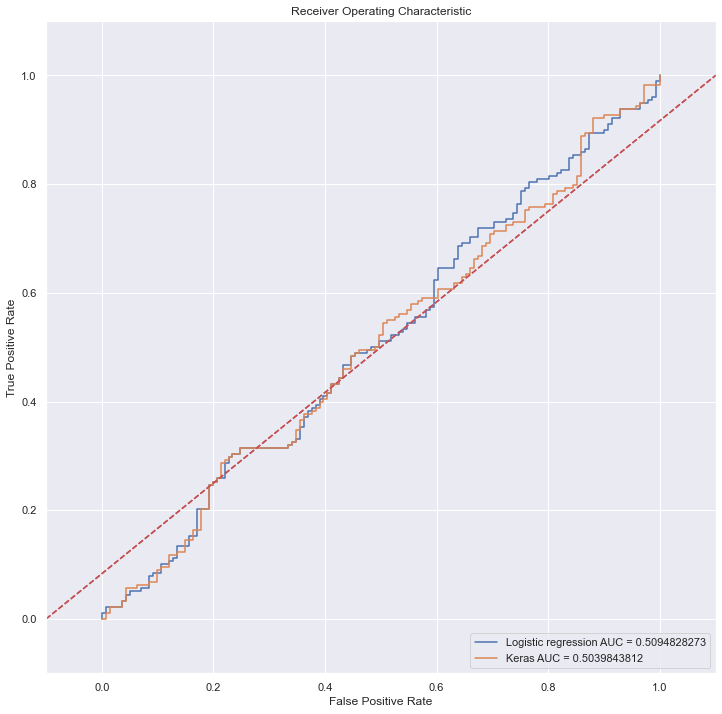

*Na podstawie 50 dni*

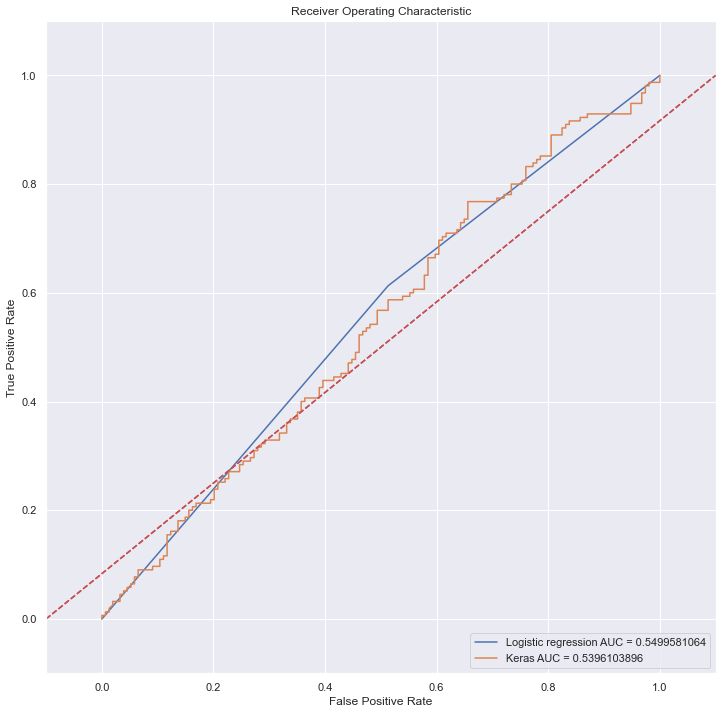

#### Wnioski

Wartości AUC w obu przypadkach są bardzo niskie. Jednak wartości w modelu drugim są nieznacznie wyższe, co może sugerować, że pomysł z wykorzystaniem danych z przeszłości nie jest taki zły. Accuracy w obu przypadkach wynosiło około 0.5

### Wnioski z obu modeli 

Drugi sposób z mniejszą ilością danych, tj. wzięcię pod uwagę tylko wartości Volume, wydaje się być nieznacznie lepszym. Może to sugerować, iż odpowiednie i bardziej dogłębne obrobienie danych mogłoby dać odrobinę lepsze wyniki. <br>
Wartości AUC 0.54 nie są tymi, jakie chcielibyśmy widzieć. Model działa nieznacznie lepiej od rzutu monetą. Na plus wydaje się fakt, że nie działa gorzej

## Przewidywane na podstawie dziennych wiadomości

### Budowanie datasetu 

Datasetem do naszego modelu będzie złączenie datasetu danych giełdowych oraz datasetu z wiadomościami (oba datasety wymienione na samym początku notebooku)

**Utworzymy dwa datasety:**
* informacja czy kurs wzrósł/zmalał danego dnia oraz **newsy ze wszystkich kategorii**
* informacja czy kurs wzrósł/zmalał danego dnia oraz **newsy z kategorii wybranych przeze mnie, które moim zdaniem mogą mieć realny wpływ na kurs**

*Dataset (nr 1)*<br>
**Plik: create_dataset_all_cat**

*Dataset (nr 2)*<br>
**Plik: create_dataset_spec_cat**

Dataset będzie miał następującą postać:<br>
Data | News_1 | News_2 | ...

### Przetwarzanie datasetu

Na początku wiadomości, a właściwie nagłówki wiadomości, dla każdego dnia złączymy razem (w jeden string). Następnie oczyścimy ten string z niektórych znaków specjalnych, neutralnych w kontekście znaczenia (naszej predykcji) wyrazów (a, the, itp.) oraz innych wyrazów, które nie powinny mieć wpływu na predykcję. 

Następnie ten oczyszczony string podzielimy sobie na frazy (słowa, lub kombinacje słów w nim występujące). Do tego celu użyjemy CountVectorizer'a. Słowa te następnie wstawimy do kolumn naszego datasetu (zapominając jednocześnie o kolumnach z newsami gdyż nie są one nam już potrzebne). 

Nasz dataset będzie miał więc następującą strukturę:<br>
Data | slowo_1| slowo_2 | slowo_3 | ...

Wartości w kolumnach slowo_[cyfra] będą oznaczały ile razy dane słowo wystąpiło w newsach w danym dniu

**Dla datasetu z wybranymi kategoriami (create_dataset_spec_cat) zbudujemy trzy datasety (w trzech różnych plikach), które będą wyciągały z tekstu: <br>**
* pojedyncze słowa - **PLIK: Predict_on_CountOne**
* frazy złożone z dwóch słów (kombinacje o dwóch słowach) - **PLIK: Predict_on_CountTwo**
* frazy złożone z trzech słów (kombinacje o trzech słowach) - **PLIK: Predict_on_CountThree**

**Natomiast dla datasetu ze wszystkimi kategoriami (create_dataset_all_cat) zbudujemy tylko jeden dataset: <br>**
* frazy złożone z trzech słów - **PLIK: ALL_Predict_on_CountThree**<br>


Następnie porównamy accuracy uzyskane przez modele nauczone w powyższych plikach

### Wyniki

#### Modele oparte o dataset z wybranymi kategoriami

##### Frazy jednowyrazowe

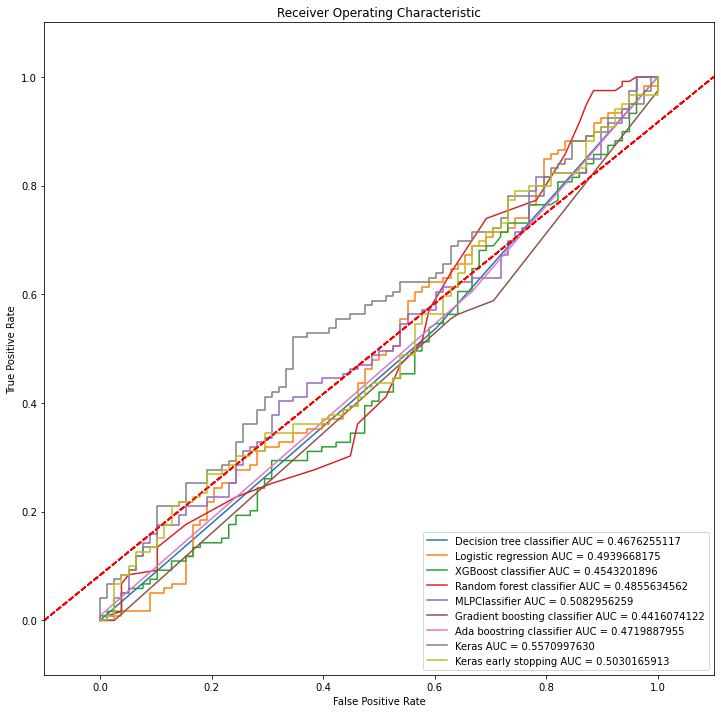

Wykres mówi wszystko, praktycznie wszystkie modele poza Kerasem mają wartości AUC poniżej 0.5. Zatem szkoda się rozpisywać na temat tego sposobu (z przewidywaniem kursu na podstawie najczęściej występujących fraz jednowyrazowych), nie jest to dobry sposób.

##### Frazy dwuwyrazowe

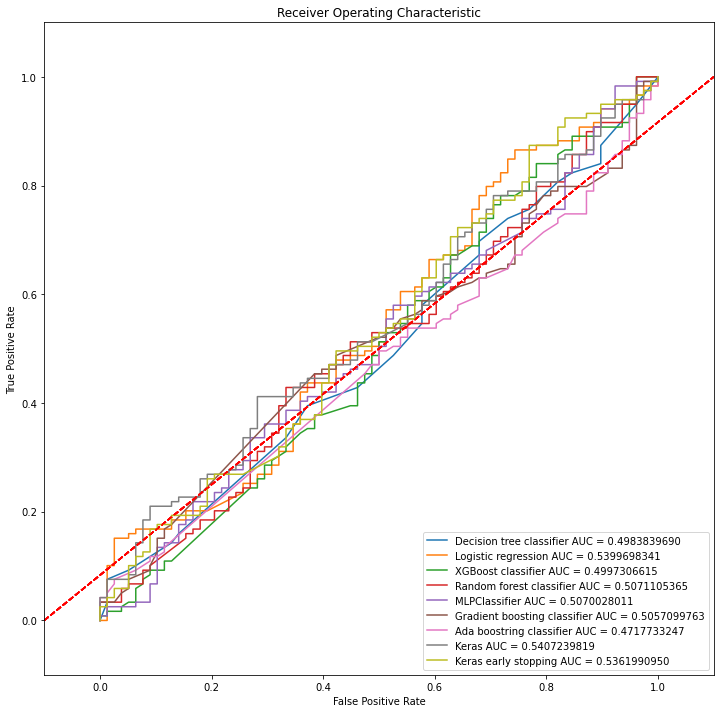

Pomysł na predykcję kursu na podstawie fraz dwuwyrazowych wygląda już nieco lepiej niż poprzedni (z frazami jednowyrazowymi). Jednak wciąż AUC jest zatrważająco niskie.

##### Frazy trójwyrazowe

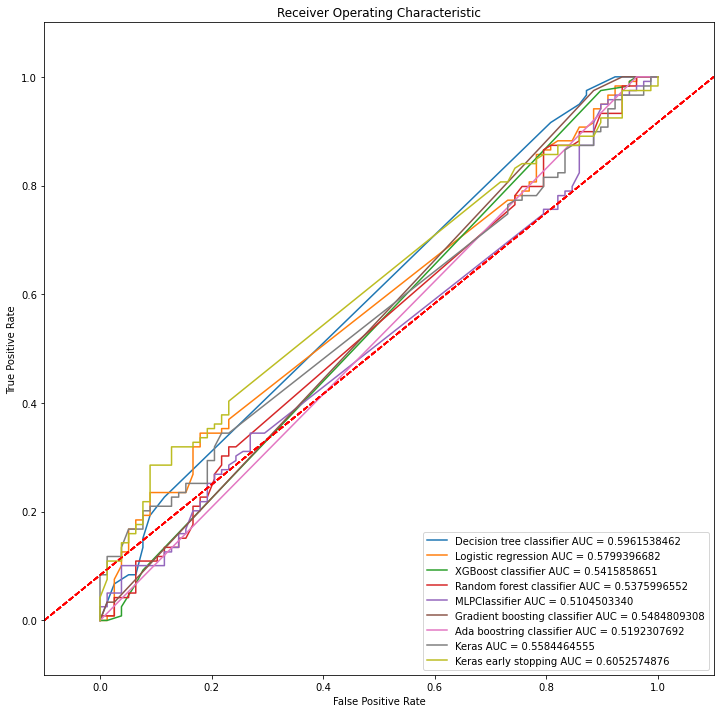

Ostatni pomysł wydaje się być najlepszym. Można już na niego popatrzeć, czego nie można powiedzieć o dwóch poprzednich pomysłach...

Osiągnęliśmy AUC rzędu 0.6

Wartość ta, jak i inne wartości AUC z pozostałych modeli, w stosunku do modeli z poprzednich przykładów, daje pewną nadzieję na pomysł z predykcją kursu na podstawie dziennych wiadomości.

Spójrzmy na tabelkę podsumowującą efektywność modeli

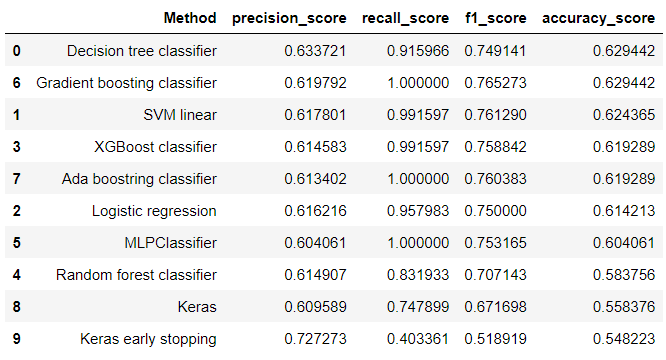

Z wykresu widać, że najwyższą wartość AUC osiągnęliśmy dla Keras early stopping oraz Decision tree classifier.

Zobaczmy jeszcze wykres przedstawiający historię uczenia dla obu modeli Kerasa

**Keras (bez early stopping)**

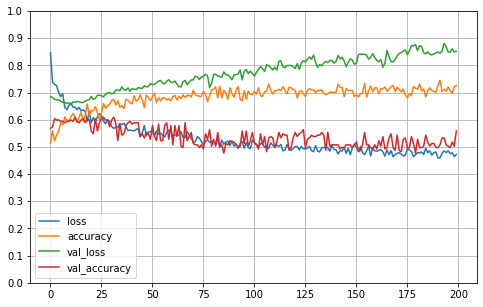

Widzimy, że do około 20 epok model na teście utrzymuje w miarę stabilne accuracy na poziomie 0.6

Do tego momentu też wartość loss na teście maleje. Potem zaczyna rosnąć. Natomiast accuracy na teście zaczyna potem stopniowo spadać.

Wydaje się być to optymistycznym faktem, gdyż jak pamiętamy AUC uzyskaliśmy najwyższe dla Kerasa

**Keras z early stopping**

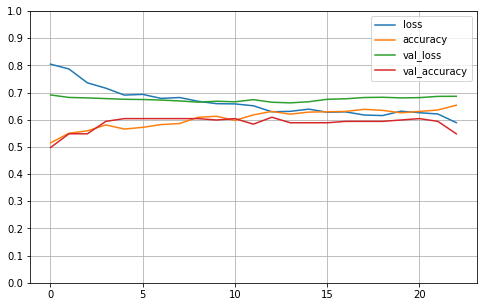

Możemy skomentować to tak samo jak poprzednio. W momencie gdy loss na teście zaczyna rosnąć, nasze accuracy na teście rozpoczyna swoją wędrówkę w dół. Akurat tak się zdarzyło, iż model zatrzymał się na accuracy 0.54, wcześniej utrzymując stabilne 0.6

#### Model oparty o dataset ze wszystkimi kategoriami

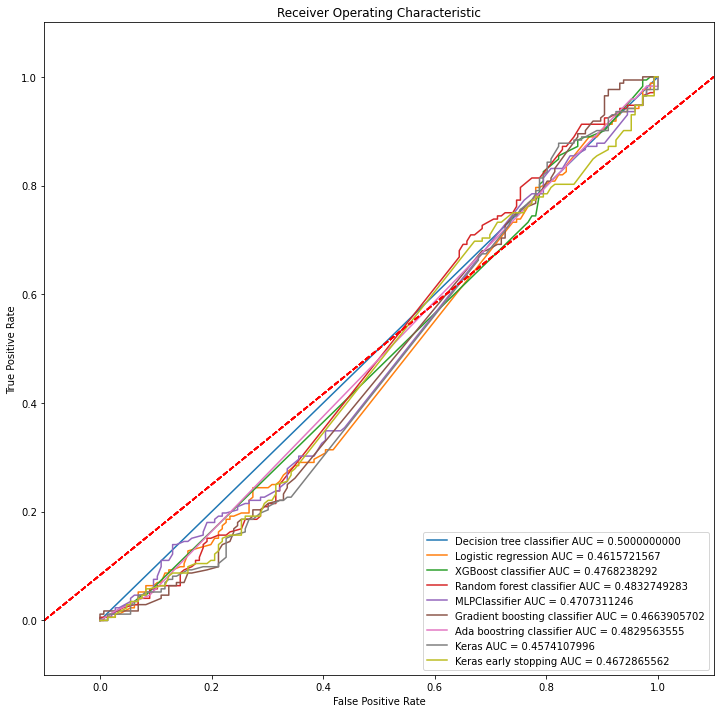

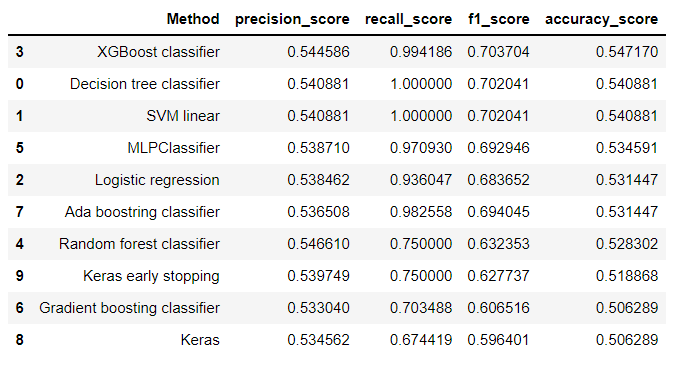

*Keras*

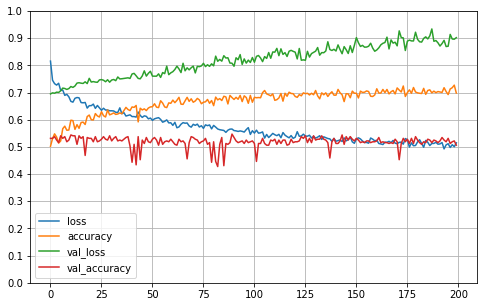

Myślę, że już pierwszy wykres ROC dobitnie wskazuje na niepowodzenie pomysłu wzięcia pod uwagę newsów ze wszystkich kategorii

Pozostałe dwie grafiki jedynie potwierdzają to, iż pomysł z usunięciem kategorii niepowiązanych z biznesem i sytuacją gospodarczą okazał się być bardzo dobry

# Wnioski z projektu

Na początku może nasuwać się pytanie dlaczego nie spróbowałem predykcji na podstawie fraz czterowyrazowych, skoro z każdym kolejnym razem otrzymywaliśmy lepszy wyniki. Otóż próbowałem, jednak wyniki zaczęły spadać, głównie ze względu na to, iż frazy czterowyrazowe są już bardzo konkretne i jest dużo ciężej znaleźć taką samą frazę we wiadomościach w innym dniu. Zwłaszcza, że nasz dataset, obrobiony w każdym przypadku, posiadał dane dla średnio 1000 dni. Nie jest to za wiele w przypadku tak skomplikowanego problemu i chęci podwyższenia wyniku o kilka dziesiątych/setnych za pomocą danych, które nie reprezentują w pełni rzeczywistości problemu.

Pozytywnym aspektem jest to, iż zawężenie datasetu wiadomości do tych kategorii, które są powiązane z problemem tj. Politics, Money, wykazało lepszą predykcję od modelu, który brał pod uwagę wiadomości ze wszystkich kategorii. 

**Myślę, że w przypadku bardziej dogłębnego obrobienia datasetu moglibyśmy uzyskać dużo lepsze AUC oraz accuracy na poziomie 0.7** <div>
Ponieważ uzyskaliśmy duży wzrost AUC jedynie poprzez usunięcie paru kategorii.

Dane surowe z giełdy takie jak np. Volume też wydają się mieć jakiś wpływ na kurs. Jednak należałoby się im bardziej dokładniej przyjrzeć i je obrobić.

**Głównym problemem naszego projektu było stworzenie optymalnego datasetu**

Myślę, że uzyskane AUC na poziomie 0.6 oraz accuracy na podobnym poziomie nie zamykają ścieżki do predykcji kursu na podstawie dziennych wiadomości.

Można stwierdzić, iż niejako odzwierciedlają one rzeczywistość giełdy.

**Ponadto sądzę, że dużo lepiej byłoby spróbować przewidywać kurs indeksu/spółki powiązanej z konkretnym rynkiem np. surowców takich jak węgiel. W połączeniu z wiadomościami istotnymi tylko i wyłącznie dla węgla znacznie poprawilibyśmy wartość naszych danych.** <br> W przypadku indeksu SP 500 ciężko było nam przewidzieć jakie wiadomości naprawdę mają wpływ na jego kurs, gdyż jest to indeks niejako odzwierciedlający sytuację ekonomiczną kraju a zatem biorący pod uwagę bardzo dużo czynników.

**Głównym problem w kontekście przewidywania giełdy pozostaje brak dobrego datasetu**